In [1]:
%matplotlib notebook
import hyperspy.api as hs
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#data file path
fp = r'/dls/science/groups/e02/Sample_data/sample_EELS_EDS_new/EDS Spectrum Image.dm4'
SI = hs.load(fp)

In [3]:
#correct for known offset
SI.axes_manager[-1].offset = -0.1

In [4]:
SI

<EDSTEMSpectrum, title: EDS Spectrum Image, dimensions: (94, 91|2048)>

In [5]:
#rebin data to improve signal to noise
SI = SI.rebin(scale = [4,4,1])

<IPython.core.display.Javascript object>


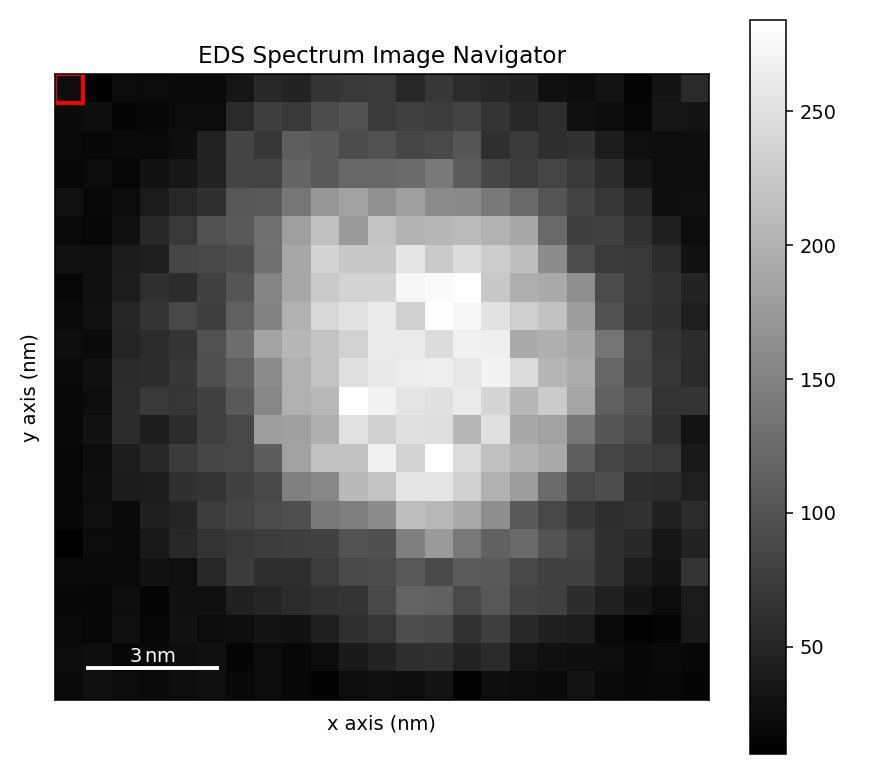

<IPython.core.display.Javascript object>


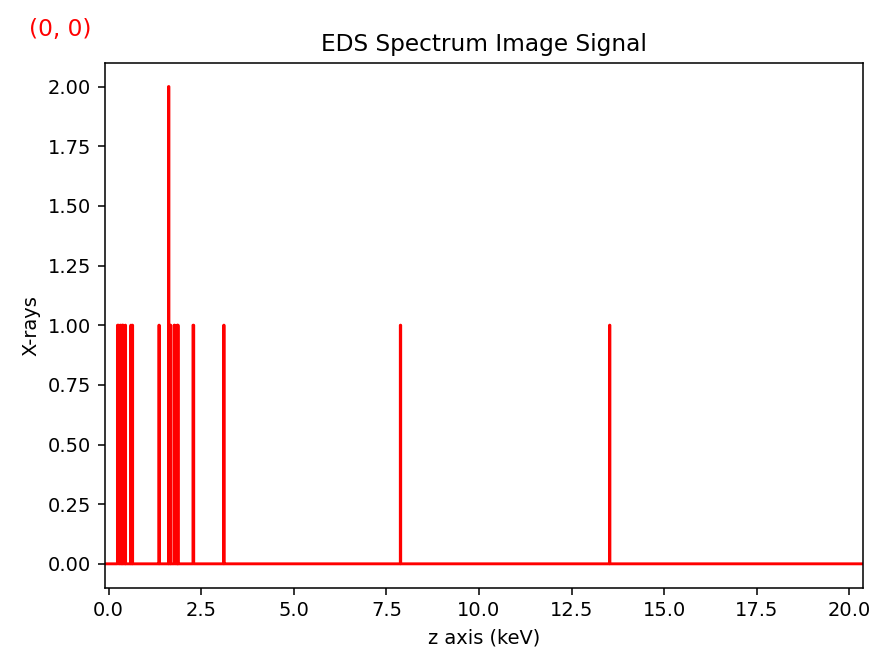

In [6]:
SI.plot()

<IPython.core.display.Javascript object>


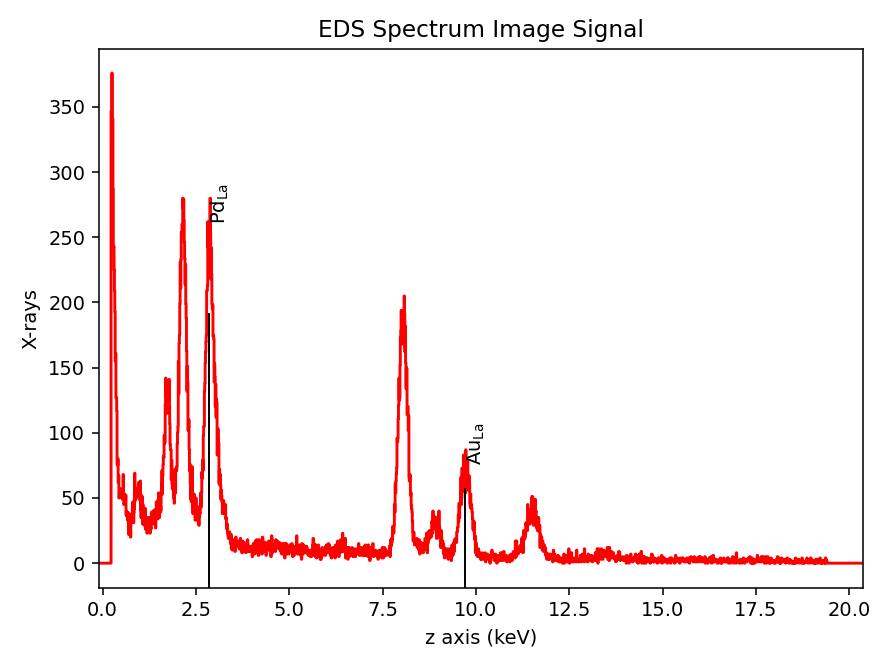

In [7]:
#define elements of interest
SI.add_elements(['Pd', 'Au'])
SI.add_lines()
SI_sum = SI.sum()
SI_sum.plot(True)

In [8]:
#get line intensities
bw = SI.estimate_background_windows(line_width = [5.0,2.0])
intensities = SI.get_lines_intensity(background_windows=bw)


<IPython.core.display.Javascript object>


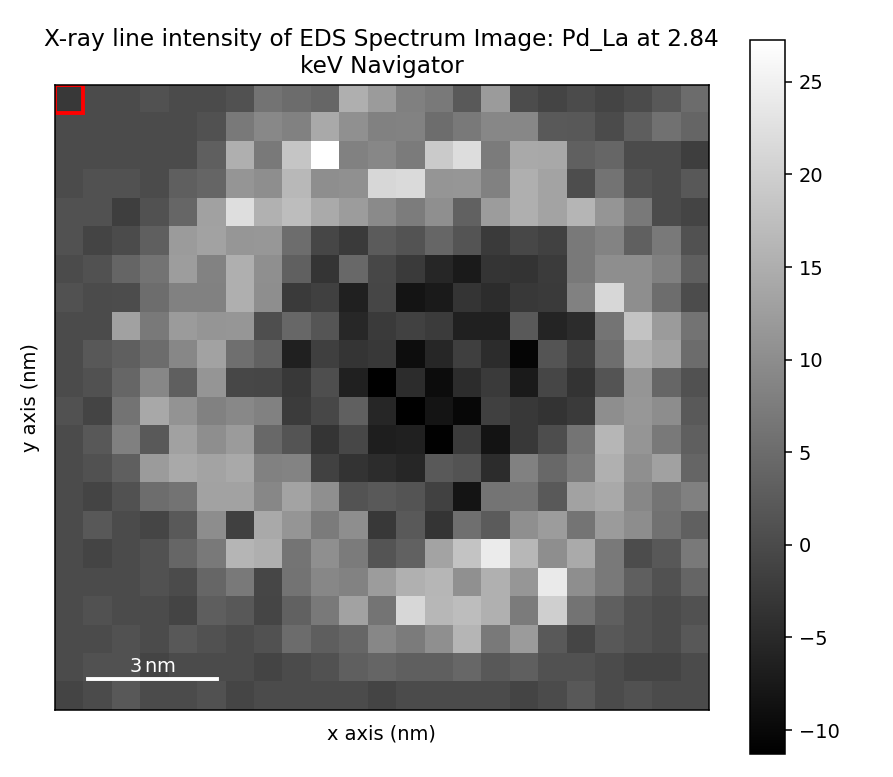

In [9]:
#and plot one of them
intensities[1].plot()

In [10]:
#mask only data where intensity > 10
mask = intensities[1].data>10
area_SI = SI.deepcopy()
mask = hs.signals.Signal2D(data = mask)
area_SI = area_SI * mask.T

<IPython.core.display.Javascript object>


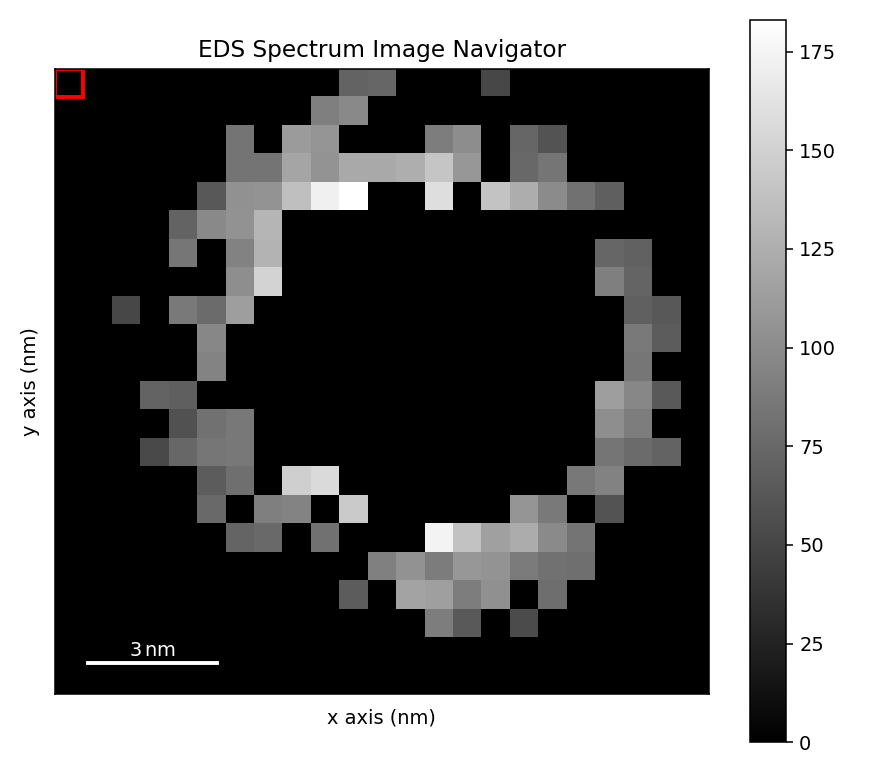

<IPython.core.display.Javascript object>


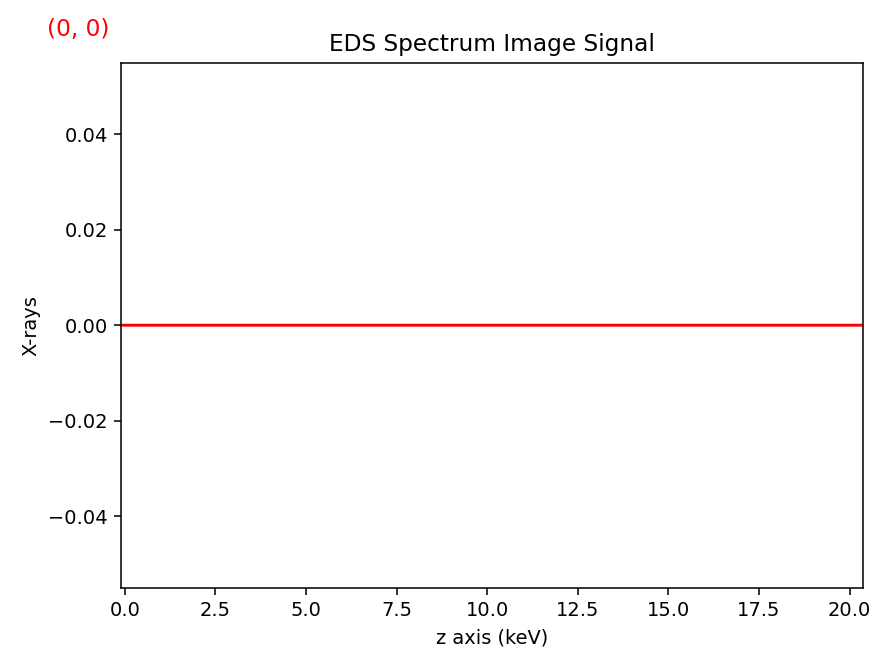

In [11]:
#plot masked data
area_SI.plot()

<IPython.core.display.Javascript object>


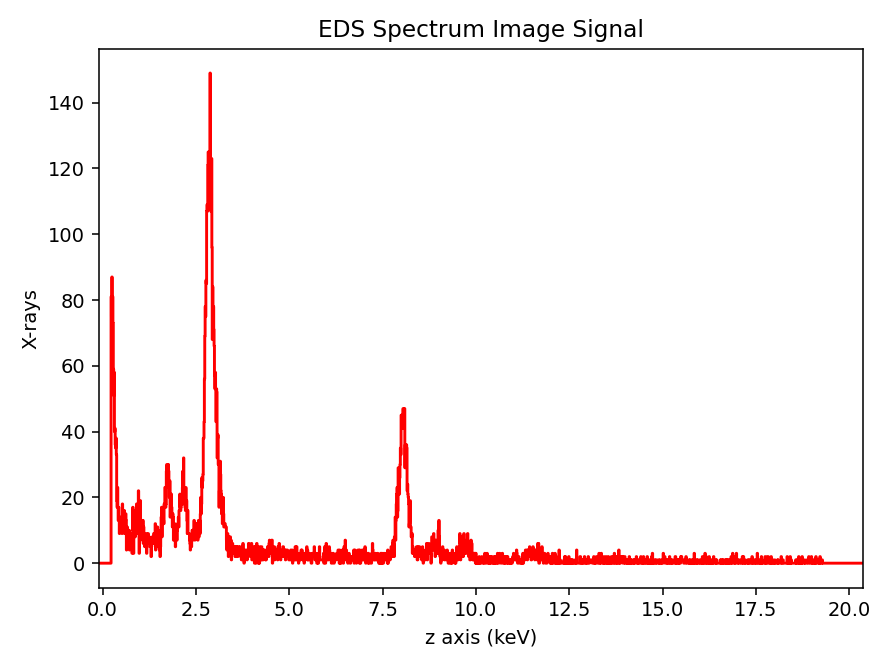

In [12]:
#plot EDX spectra from only masked region
area_SI_sum = area_SI.sum()
area_SI_sum.plot()